# Importing Libraries

In [7]:
import random
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
from tensorflow.keras.callbacks import ModelCheckpoint
import keras.models
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import tensorflow_docs.plots
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import itertools
import optuna

# Importing Datasets

In [8]:
ANN_DS=pd.read_csv('ANN_dataset/ANN.csv')

# Inspecting Datasets

In [9]:
ANN_DS.head()

Wn  HTE     I     h   Qc/A          Th          Tc
0  7.5  3.2  16.0  3000  14400  298.225110  327.033621
1  5.5  2.8  27.0  8500  18200  295.987849  337.935540
2  7.8  3.8   1.0   100   2600  319.000490  330.691621
3  5.0  0.5  13.5  3500  11200  296.419181  304.348465
4  7.7  1.7  10.5  8600   7400  294.040030  299.088067

In [12]:
ANN_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wn      5000 non-null   float64
 1   HTE     5000 non-null   float64
 2   I       5000 non-null   float64
 3   h       5000 non-null   int64  
 4   Qc/A    5000 non-null   int64  
 5   Th      5000 non-null   float64
 6   Tc      5000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 273.6 KB


In [13]:
ANN_DS.describe()

Wn          HTE            I             h          Qc/A  \
count  5000.000000  5000.000000  5000.000000   5000.000000   5000.000000   
mean      6.028660     2.502640    15.565900   5060.620000  10373.920000   
std       1.187792     1.154329     8.529089   2895.956583   5503.181701   
min       4.000000     0.500000     1.000000    100.000000   1000.000000   
25%       5.000000     1.500000     8.500000   2600.000000   5600.000000   
50%       6.100000     2.500000    15.500000   5100.000000  10400.000000   
75%       7.100000     3.425000    23.000000   7600.000000  15000.000000   
max       8.000000     4.500000    30.000000  10000.000000  20000.000000   

                Th           Tc  
count  5000.000000  5000.000000  
mean    300.187056   323.524492  
std      21.270250    52.473197  
min     293.304207   233.168502  
25%     294.667591   290.418989  
50%     295.676202   311.939069  
75%     298.057386   343.510847  
max     654.143239   697.337621

In [14]:
print(ANN_DS.shape)

(5000, 7)


In [15]:
ANN_DS.isnull().sum()

Wn      0
HTE     0
I       0
h       0
Qc/A    0
Th      0
Tc      0
dtype: int64

# Splitting the Datasets

In [16]:
ANN_train,ANN_test= train_test_split(ANN_DS,test_size=0.2, random_state=42)

In [17]:
ANN_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 4227 to 860
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wn      4000 non-null   float64
 1   HTE     4000 non-null   float64
 2   I       4000 non-null   float64
 3   h       4000 non-null   int64  
 4   Qc/A    4000 non-null   int64  
 5   Th      4000 non-null   float64
 6   Tc      4000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 250.0 KB


In [18]:
ANN_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1501 to 1926
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wn      1000 non-null   float64
 1   HTE     1000 non-null   float64
 2   I       1000 non-null   float64
 3   h       1000 non-null   int64  
 4   Qc/A    1000 non-null   int64  
 5   Th      1000 non-null   float64
 6   Tc      1000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 62.5 KB


In [19]:
ANN_final_test,ANN_validation=train_test_split(ANN_test,test_size=0.5,random_state=42)

In [20]:
ANN_final_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 2922 to 2131
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wn      500 non-null    float64
 1   HTE     500 non-null    float64
 2   I       500 non-null    float64
 3   h       500 non-null    int64  
 4   Qc/A    500 non-null    int64  
 5   Th      500 non-null    float64
 6   Tc      500 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 31.2 KB


In [21]:
ANN_validation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 3707 to 2498
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wn      500 non-null    float64
 1   HTE     500 non-null    float64
 2   I       500 non-null    float64
 3   h       500 non-null    int64  
 4   Qc/A    500 non-null    int64  
 5   Th      500 non-null    float64
 6   Tc      500 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 31.2 KB


# Drop the coloumns Th and Tc 

In [22]:
ANN_train_final=ANN_train.drop(["Th","Tc"],axis=1)
ANN_test_final=ANN_test.drop(["Th","Tc"],axis=1)
ANN_validation_final=ANN_validation.drop(["Th","Tc"],axis=1)

# Pairplots and Histograms

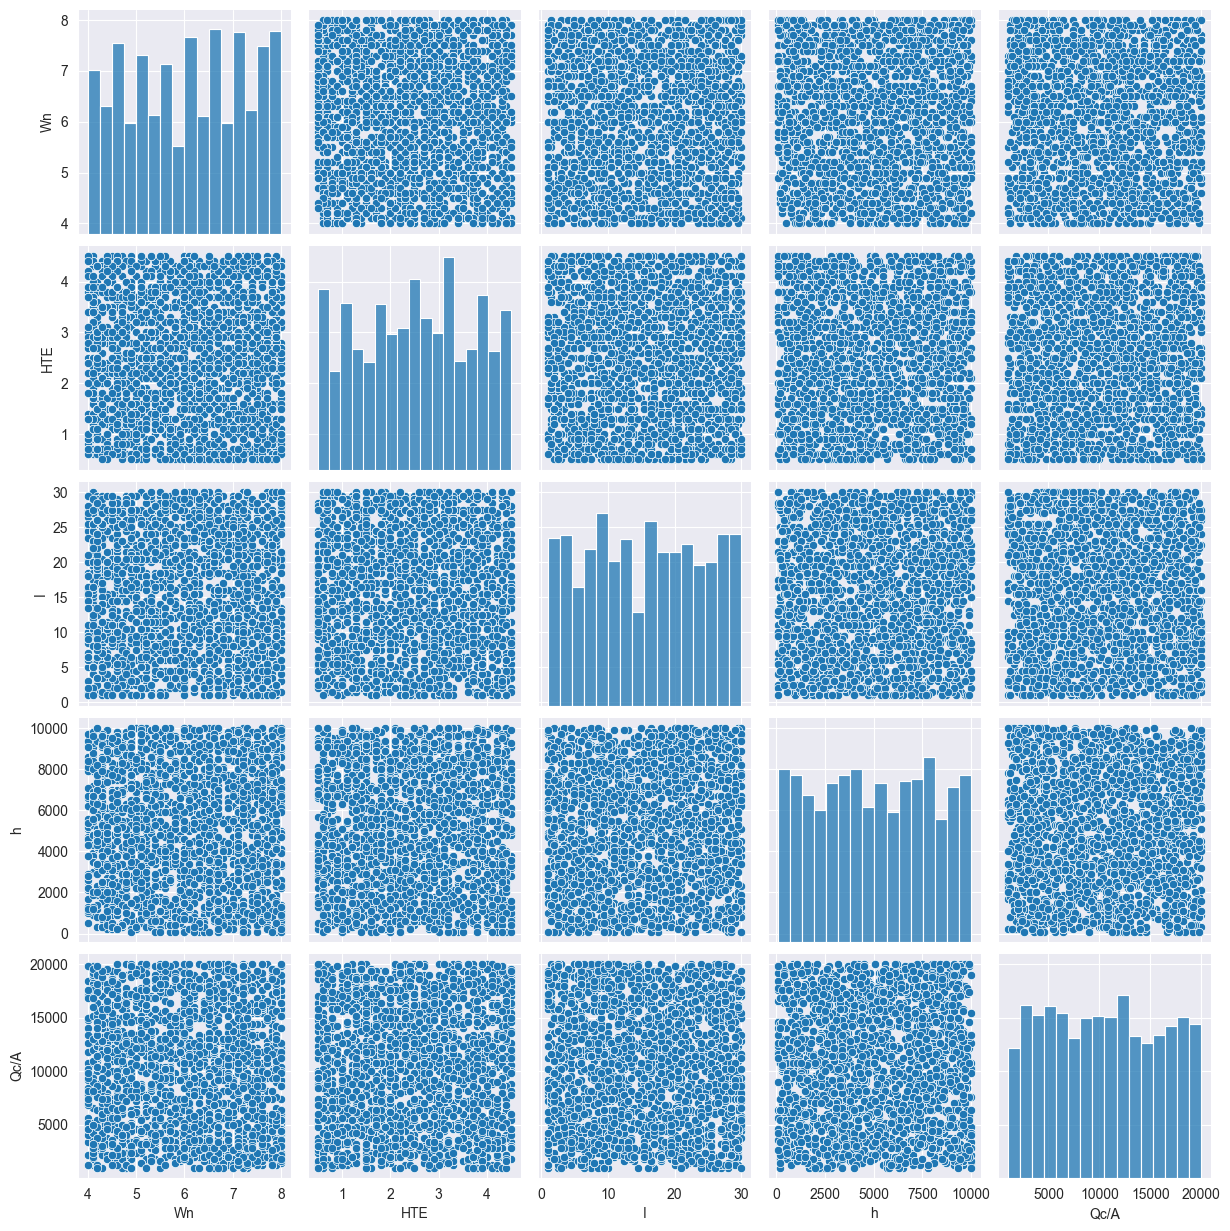

In [23]:
# Set seaborn style
sns.set_style('darkgrid')
# Create pairplot
pairplot = sns.pairplot(ANN_train_final)
# Save the pairplot as a PNG file
pairplot.savefig('graphs/pairplot.png')
# Show the pairplot
plt.show()

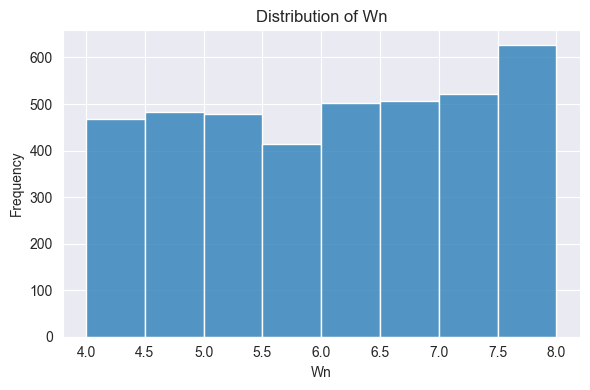

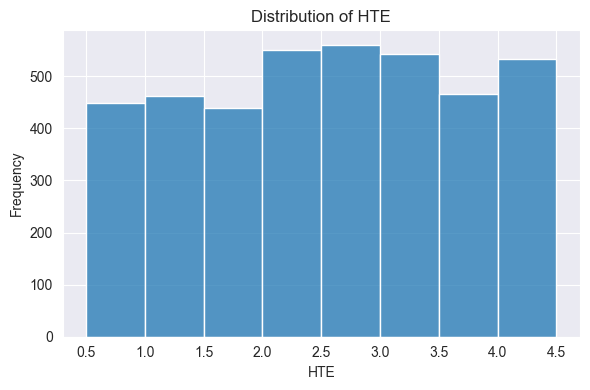

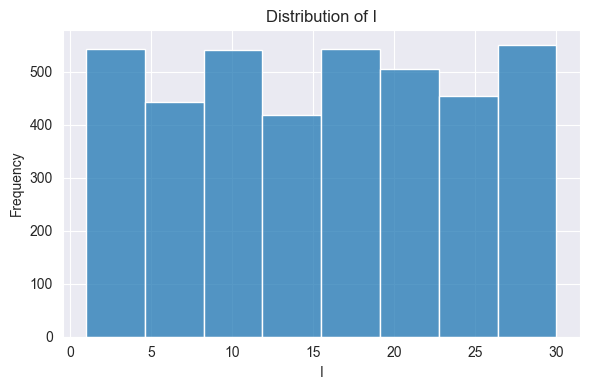

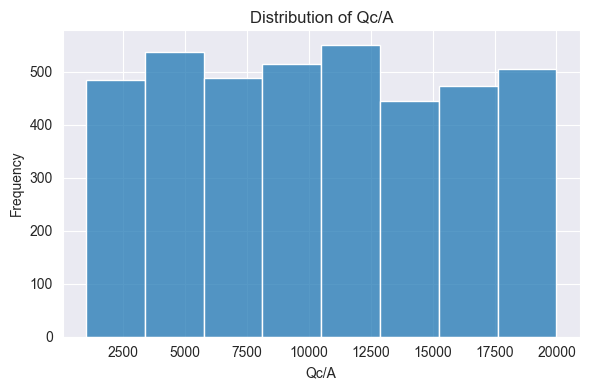

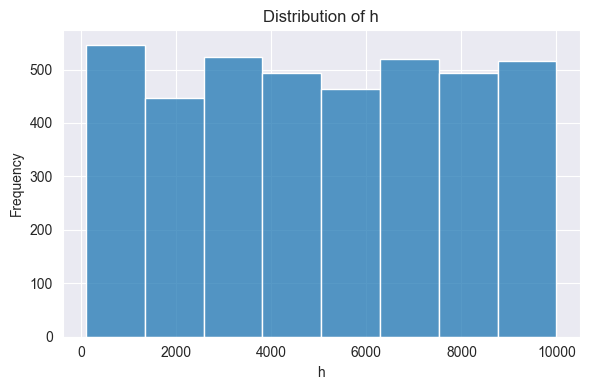

In [24]:
# Set seaborn style
sns.set_style('darkgrid')

# Define the variables to plot
variables = ["Wn", "HTE", "I", "Qc/A", "h"]

# Create the directory if it doesn't exist
os.makedirs('graphs', exist_ok=True)

# Create separate plots for each variable
for variable in variables:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    sns.histplot(ANN_train_final[variable], kde=False, bins=8)  # Set bins to 8
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout
    # Replace '/' with '_' in the filename
    filename = f'graphs/distplot_{variable.replace("/", "_")}.png'
    plt.savefig(filename)  # Save each plot separately

    # Show each plot
    plt.show()

# Creating Datasets for Labels

In [25]:
ANN_train_labels = ANN_train.drop(["Wn","HTE","I","h","Qc/A"],axis=1)
ANN_test_labels = ANN_test.drop(["Wn","HTE","I","h","Qc/A"],axis=1)
ANN_validation_labels = ANN_validation.drop(["Wn","HTE","I","h","Qc/A"],axis=1)

# Put the Datasets through a Min Max Scaler

In [26]:
scaler=MinMaxScaler().fit(ANN_train_final)
ANN_train_scaled=scaler.transform(ANN_train_final)
ANN_test_scaled=scaler.transform(ANN_test_final)
ANN_validation_scaled=scaler.transform(ANN_validation_final)

In [27]:
ANN_train_scaled_df=pd.DataFrame(ANN_train_scaled,columns=["Wn","HTE","I","h","Qc/A"])
ANN_test_scaled_df=pd.DataFrame(ANN_test_scaled,columns=["Wn","HTE","I","h","Qc/A"])
ANN_validation_scaled_df=pd.DataFrame(ANN_validation_scaled,columns=["Wn","HTE","I","h","Qc/A"])

# Inspect the scaled Datasets

In [28]:
ANN_train_scaled_df.describe()

Wn          HTE            I            h         Qc/A
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000
mean      0.511531     0.503200     0.500289     0.498232     0.495650
std       0.297283     0.286511     0.293874     0.291948     0.289598
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.250000     0.250000     0.258621     0.252525     0.242105
50%       0.525000     0.500000     0.500000     0.494949     0.494737
75%       0.775000     0.725000     0.758621     0.757576     0.747368
max       1.000000     1.000000     1.000000     1.000000     1.000000

# Defining the ANN Architecture

In [27]:
#setting the value of seeds
seed_value = 42
random.seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [28]:
# Define the function to create the ANN model with specified hyperparameters
def create_model(num_hidden_layers, num_neurons, learning_rate, dropout_rate):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(5, input_shape=(ANN_train_scaled_df.shape[1],)))
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_neurons, activation='relu'))
        model.add(tf.keras.layers.Dropout(dropout_rate))  # Add dropout layer
    model.add(tf.keras.layers.Dense(2))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

# Define the objective function
def objective(trial):
    # Sample hyperparameters
    num_hidden_layers = trial.suggest_int('num_hidden_layers', 1,4)
    num_neurons = trial.suggest_int('num_neurons', 100, 300)
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 0.01)
    dropout_rate = trial.suggest_float('dropout_rate', 0, 0.2)  
    batch_size = trial.suggest_categorical('batch_size', [16,32,64])
    epochs = trial.suggest_int('epochs', 100, 1000)

    # Create and train the model
    model = create_model(num_hidden_layers, num_neurons, learning_rate, dropout_rate)
    
    
    history = model.fit(
        ANN_train_scaled_df, ANN_train_labels,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(ANN_validation_scaled_df, ANN_validation_labels),
        verbose=0
    )

    # Evaluate the model
    mse_score = model.evaluate(ANN_train_scaled_df, ANN_train_labels)[0]
    return mse_score


# Optuna

In [29]:
# Define the search space
study = optuna.create_study(direction='minimize',sampler=optuna.samplers.RandomSampler(42))


[I 2024-02-27 21:02:50,073] A new study created in memory with name: no-name-127f35a5-f0b8-438b-b47f-f1629b728f23


In [30]:
with tf.device('/GPU:0'):
    study.optimize(objective, n_trials=15)

125/125 [==============================] - 0s 1ms/step - loss: 13.4919 - mse: 13.4919


[I 2024-02-27 21:07:52,217] Trial 0 finished with value: 13.491930961608887 and parameters: {'num_hidden_layers': 2, 'num_neurons': 291, 'learning_rate': 0.007346740023932911, 'dropout_rate': 0.11973169683940732, 'batch_size': 16, 'epochs': 880}. Best is trial 0 with value: 13.491930961608887.


125/125 [==============================] - 0s 988us/step - loss: 24.2950 - mse: 24.2950


[I 2024-02-27 21:09:24,287] Trial 1 finished with value: 24.295045852661133 and parameters: {'num_hidden_layers': 3, 'num_neurons': 242, 'learning_rate': 0.00030378649352844425, 'dropout_rate': 0.19398197043239887, 'batch_size': 16, 'epochs': 265}. Best is trial 0 with value: 13.491930961608887.


125/125 [==============================] - 0s 973us/step - loss: 27.2689 - mse: 27.2689


[I 2024-02-27 21:11:18,474] Trial 2 finished with value: 27.268863677978516 and parameters: {'num_hidden_layers': 2, 'num_neurons': 205, 'learning_rate': 0.004376255684556947, 'dropout_rate': 0.058245828039608386, 'batch_size': 16, 'epochs': 430}. Best is trial 0 with value: 13.491930961608887.


125/125 [==============================] - 0s 949us/step - loss: 53.2485 - mse: 53.2485


[I 2024-02-27 21:11:49,751] Trial 3 finished with value: 53.248470306396484 and parameters: {'num_hidden_layers': 2, 'num_neurons': 257, 'learning_rate': 0.0020767704433677613, 'dropout_rate': 0.10284688768272232, 'batch_size': 64, 'epochs': 253}. Best is trial 0 with value: 13.491930961608887.


125/125 [==============================] - 0s 895us/step - loss: 32.5633 - mse: 32.5633


[I 2024-02-27 21:12:34,514] Trial 4 finished with value: 32.563270568847656 and parameters: {'num_hidden_layers': 1, 'num_neurons': 290, 'learning_rate': 0.009659757127438138, 'dropout_rate': 0.16167946962329224, 'batch_size': 64, 'epochs': 496}. Best is trial 0 with value: 13.491930961608887.


125/125 [==============================] - 0s 919us/step - loss: 385.0330 - mse: 385.0330


[I 2024-02-27 21:13:56,329] Trial 5 finished with value: 385.032958984375 and parameters: {'num_hidden_layers': 1, 'num_neurons': 199, 'learning_rate': 0.00044044635904066216, 'dropout_rate': 0.1818640804157564, 'batch_size': 32, 'epochs': 568}. Best is trial 0 with value: 13.491930961608887.


125/125 [==============================] - 0s 1ms/step - loss: 123.4418 - mse: 123.4418


[I 2024-02-27 21:17:59,064] Trial 6 finished with value: 123.44178771972656 and parameters: {'num_hidden_layers': 3, 'num_neurons': 137, 'learning_rate': 0.00969888781486913, 'dropout_rate': 0.15502656467222292, 'batch_size': 16, 'epochs': 930}. Best is trial 0 with value: 13.491930961608887.


125/125 [==============================] - 0s 898us/step - loss: 436.1366 - mse: 436.1366


[I 2024-02-27 21:18:37,654] Trial 7 finished with value: 436.1365966796875 and parameters: {'num_hidden_layers': 1, 'num_neurons': 139, 'learning_rate': 0.0005477501602143269, 'dropout_rate': 0.06506606615265287, 'batch_size': 64, 'epochs': 421}. Best is trial 0 with value: 13.491930961608887.


125/125 [==============================] - 0s 1ms/step - loss: 58.3797 - mse: 58.3797


[I 2024-02-27 21:19:23,983] Trial 8 finished with value: 58.37968826293945 and parameters: {'num_hidden_layers': 2, 'num_neurons': 209, 'learning_rate': 0.0014951498272501504, 'dropout_rate': 0.16043939615080793, 'batch_size': 32, 'epochs': 279}. Best is trial 0 with value: 13.491930961608887.


125/125 [==============================] - 0s 967us/step - loss: 65.2726 - mse: 65.2726


[I 2024-02-27 21:20:09,986] Trial 9 finished with value: 65.27259826660156 and parameters: {'num_hidden_layers': 1, 'num_neurons': 263, 'learning_rate': 0.00709788770409141, 'dropout_rate': 0.14580143360819747, 'batch_size': 16, 'epochs': 204}. Best is trial 0 with value: 13.491930961608887.


125/125 [==============================] - 0s 1ms/step - loss: 23.2560 - mse: 23.2560


[I 2024-02-27 21:22:54,395] Trial 10 finished with value: 23.256006240844727 and parameters: {'num_hidden_layers': 4, 'num_neurons': 225, 'learning_rate': 0.003375890446041227, 'dropout_rate': 0.012711670057204728, 'batch_size': 64, 'epochs': 674}. Best is trial 0 with value: 13.491930961608887.


125/125 [==============================] - 0s 1ms/step - loss: 24.4044 - mse: 24.4044


[I 2024-02-27 21:24:54,163] Trial 11 finished with value: 24.40435028076172 and parameters: {'num_hidden_layers': 4, 'num_neurons': 194, 'learning_rate': 0.001283983034789187, 'dropout_rate': 0.14264895744459902, 'batch_size': 64, 'epochs': 544}. Best is trial 0 with value: 13.491930961608887.


125/125 [==============================] - 0s 1ms/step - loss: 8.5033 - mse: 8.5033


[I 2024-02-27 21:26:57,748] Trial 12 finished with value: 8.50327205657959 and parameters: {'num_hidden_layers': 3, 'num_neurons': 185, 'learning_rate': 0.00035164935476654236, 'dropout_rate': 0.02157828539866089, 'batch_size': 32, 'epochs': 558}. Best is trial 12 with value: 8.50327205657959.


125/125 [==============================] - 0s 962us/step - loss: 30.6101 - mse: 30.6101


[I 2024-02-27 21:27:47,849] Trial 13 finished with value: 30.61012077331543 and parameters: {'num_hidden_layers': 4, 'num_neurons': 150, 'learning_rate': 0.004162790938052735, 'dropout_rate': 0.15111022770860974, 'batch_size': 64, 'epochs': 245}. Best is trial 12 with value: 8.50327205657959.


125/125 [==============================] - 0s 1ms/step - loss: 93.2607 - mse: 93.2607


[I 2024-02-27 21:29:54,997] Trial 14 finished with value: 93.26070404052734 and parameters: {'num_hidden_layers': 4, 'num_neurons': 262, 'learning_rate': 0.006370697189453193, 'dropout_rate': 0.17429211803754355, 'batch_size': 64, 'epochs': 585}. Best is trial 12 with value: 8.50327205657959.


In [31]:
# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

Best hyperparameters: {'num_hidden_layers': 3, 'num_neurons': 185, 'learning_rate': 0.00035164935476654236, 'dropout_rate': 0.02157828539866089, 'batch_size': 32, 'epochs': 558}


# Hyperparameters Plots

C:\Users\user\AppData\Local\Temp\ipykernel_16024\2173503611.py:5: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  ax = mpl.plot_param_importances(study)


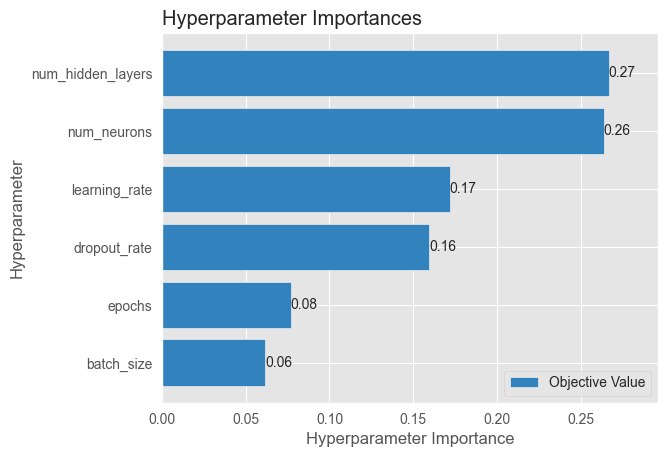

In [32]:
import optuna.visualization.matplotlib as mpl
import matplotlib.pyplot as plt

# Generate the plot
ax = mpl.plot_param_importances(study)

# Save the plot as a PNG file
ax.figure.savefig('graphs/param_importances_plot.png')

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16024\1763563114.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  ax = mpl.plot_optimization_history(study)


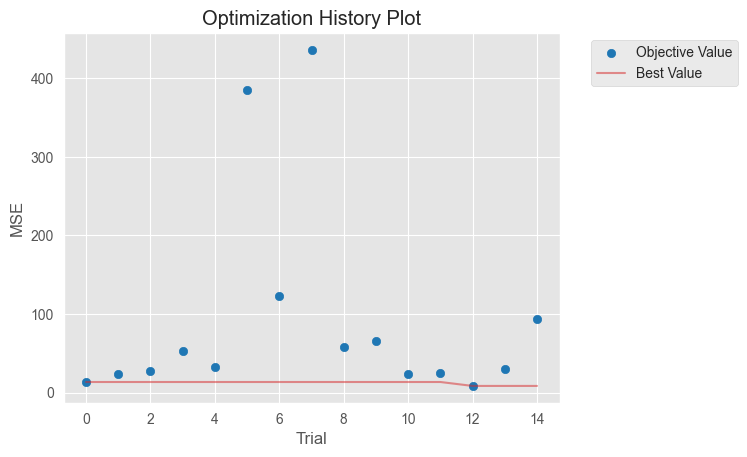

In [33]:
# Generate the plot
ax = mpl.plot_optimization_history(study)
# Set y-axis label
ax.set_ylabel('MSE')
# Save the plot as a PNG file
ax.figure.savefig('graphs/optimization_history_plot.png')

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16024\3735036978.py:2: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  ax = mpl.plot_parallel_coordinate(study,params=['num_hidden_layers','num_neurons','learning_rate','dropout_rate','batch_size','epochs'])


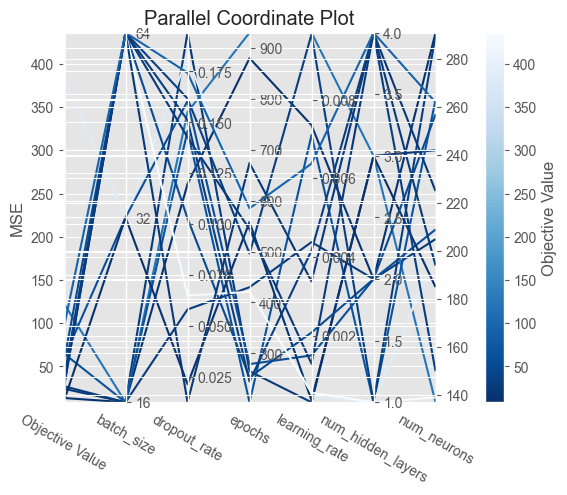

In [34]:
# Generate the plot
ax = mpl.plot_parallel_coordinate(study,params=['num_hidden_layers','num_neurons','learning_rate','dropout_rate','batch_size','epochs'])
# Set y-axis label
ax.set_ylabel('MSE')
# Save the plot as a PNG file
ax.figure.savefig('graphs/parallel_coordinate_plot.png')

C:\Users\user\AppData\Local\Temp\ipykernel_16024\3010772111.py:2: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  fig = optuna.visualization.matplotlib.plot_slice(study, params=['num_hidden_layers','num_neurons','learning_rate','dropout_rate','batch_size','epochs'])


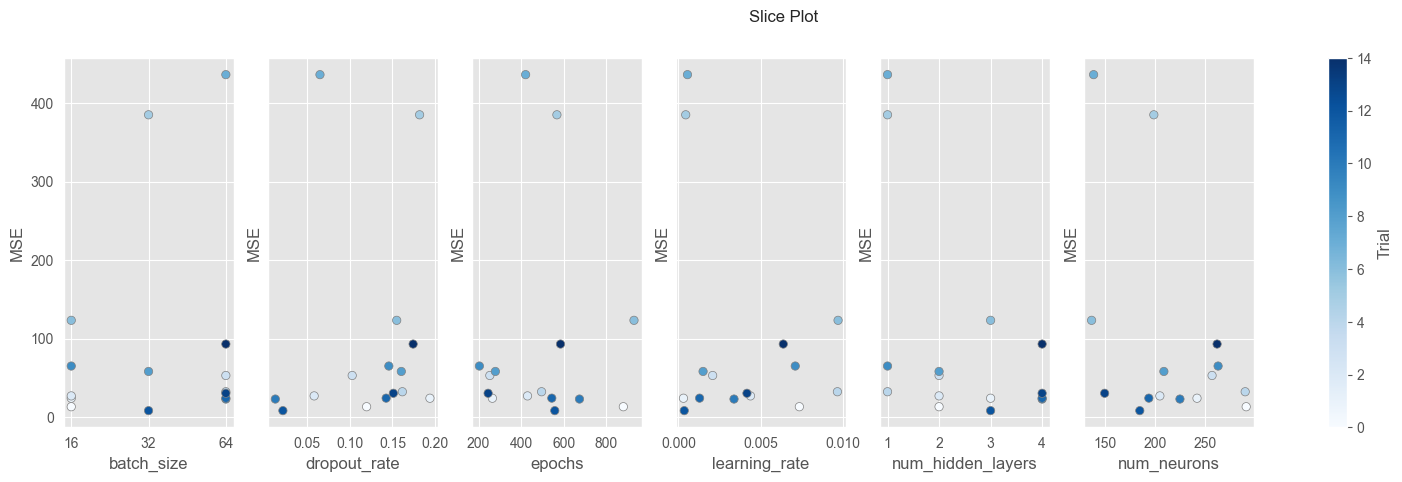

In [35]:
# Generate the plot
fig = optuna.visualization.matplotlib.plot_slice(study, params=['num_hidden_layers','num_neurons','learning_rate','dropout_rate','batch_size','epochs'])

# Iterate over each axis and set the y-axis label
for ax in fig:
    ax.set_ylabel('MSE')

# Save the plot as a PNG file
fig[0].figure.savefig('graphs/slice_plot.png')

# Show the plot
plt.show()


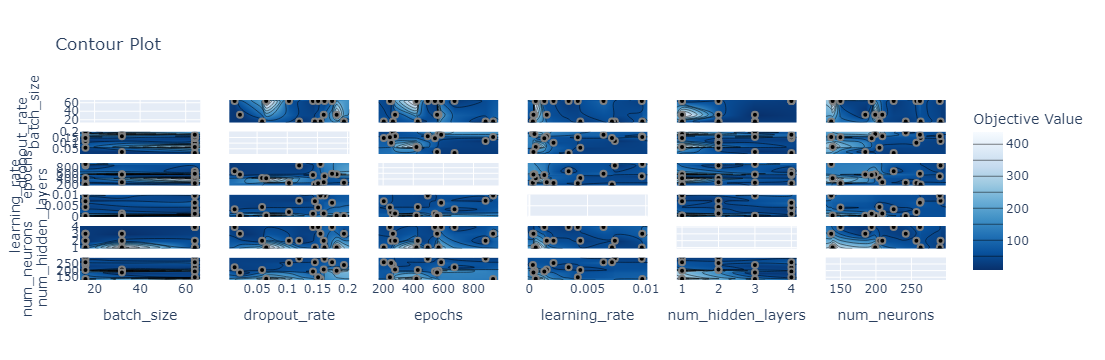

In [36]:
# Generate the plot
optuna.visualization.plot_contour(study,params=['num_hidden_layers','num_neurons','learning_rate','dropout_rate','batch_size','epochs'])


# Update the Hyperparameters

In [37]:
best_num_hidden_layers=best_params['num_hidden_layers']
best_num_neurons=best_params['num_neurons']
best_learning_rate=best_params['learning_rate']
best_dropout_rate=best_params['dropout_rate']
best_batch_size=best_params['batch_size']
best_epochs=best_params['epochs']

In [38]:
# Create and train the model
best_model = create_model(
    num_hidden_layers=best_num_hidden_layers, 
    num_neurons=best_num_neurons, 
    learning_rate=best_learning_rate, 
    dropout_rate=best_dropout_rate
)

In [39]:
best_history = best_model.fit(
    ANN_train_scaled_df, ANN_train_labels,
    epochs=best_epochs,
    batch_size=best_batch_size,
    validation_data=(ANN_validation_scaled_df, ANN_validation_labels),
    verbose=1
)


Epoch 1/558
125/125 [==============================] - 1s 3ms/step - loss: 76599.4922 - mse: 76599.4922 - val_loss: 7897.2925 - val_mse: 7897.2925 - learning_rate: 3.5165e-04
Epoch 2/558
125/125 [==============================] - 0s 2ms/step - loss: 5018.4927 - mse: 5018.4927 - val_loss: 4179.5010 - val_mse: 4179.5010 - learning_rate: 3.5165e-04
Epoch 3/558
125/125 [==============================] - 0s 2ms/step - loss: 4162.3755 - mse: 4162.3755 - val_loss: 3489.7493 - val_mse: 3489.7493 - learning_rate: 3.5165e-04
Epoch 4/558
125/125 [==============================] - 0s 2ms/step - loss: 3457.2961 - mse: 3457.2961 - val_loss: 2839.6794 - val_mse: 2839.6794 - learning_rate: 3.5165e-04
Epoch 5/558
125/125 [==============================] - 0s 2ms/step - loss: 2704.7822 - mse: 2704.7822 - val_loss: 2209.0244 - val_mse: 2209.0244 - learning_rate: 3.5165e-04
Epoch 6/558
125/125 [==============================] - 0s 2ms/step - loss: 2050.2769 - mse: 2050.2769 - val_loss: 1634.1942 - val_mse

# Saving the Model

In [40]:
import os

# Define the directory where you want to save the model
save_dir = 'First_Tune'

# Make sure the directory exists, otherwise create it
os.makedirs(save_dir, exist_ok=True)

# Save the entire model
best_model.save(os.path.join(save_dir, 'best_model.h5'))

# Or save only the model architecture to JSON and the weights to HDF5
# Save model architecture as JSON
model_json = best_model.to_json()
with open(os.path.join(save_dir, "best_model.json"), "w") as json_file:
    json_file.write(model_json)

# Save model weights
best_model.save_weights(os.path.join(save_dir, "best_model_weights.h5"))


# Load the Saved Model

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import os

# Load the model
from tensorflow.keras.models import load_model
model_path = 'First_Tune/best_model.h5'
loaded_model = load_model(model_path)

# Inspecting the Results

In [29]:
hist=pd.DataFrame(best_history.history)
hist['epoch']=best_history.epoch
hist.tail()

NameError: name 'best_history' is not defined

In [30]:
# Create the HistoryPlotter object
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=10)

# Plot the history
plotter.plot({'Basic': best_history}, metric="mse")

# Set y-axis limits
plt.ylim([0, 4000])

# Set y-axis label
plt.ylabel('MSE')

# Save the plot as a PNG file
plt.savefig('graphs/history_plot.png')

# Show the plot
plt.show()

NameError: name 'best_history' is not defined

In [31]:
# Assuming ANN_train_scaled_df and ANN_train_labels are your training data
# Predict labels for all samples
train_predictions = loaded_model.predict(ANN_train_scaled_df)

# Compute MSE and MAPE for all predicted labels and true labels
mse_train = mean_squared_error(ANN_train_labels, train_predictions)
mape_train = (1 - mean_absolute_percentage_error(ANN_train_labels, train_predictions)) * 100

print("Training MSE:", mse_train)
print("Training Accuracy:", mape_train, "%")

125/125 [==============================] - 0s 950us/step
Training MSE: 6.440101912864952
Training Accuracy: 99.59620084869321 %


In [32]:

# Predict labels for all samples
validation_predictions = loaded_model.predict(ANN_validation_scaled_df)

# Compute MSE and MAPE for all predicted labels and true labels
mse_validation = mean_squared_error(ANN_validation_labels, validation_predictions)
mape_validation = (1-mean_absolute_percentage_error(ANN_validation_labels, validation_predictions))*100

print("Validation MSE:", mse_validation)
print("Validation accuracy:", mape_validation, "%")

16/16 [==============================] - 0s 1ms/step
Validation MSE: 4.85071160189937
Validation accuracy: 99.58181118086591 %


# Evaluating the Testing Set

In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict labels for all samples
test_predictions = loaded_model.predict(ANN_test_scaled_df)

# Compute MSE for all predicted labels and true labels
mse = mean_squared_error(ANN_test_labels, test_predictions)
mape_test = (1-mean_absolute_percentage_error(ANN_test_labels, test_predictions))*100
print(" Testing MSE:", mse)
print(" Testing accuracy:", mape_test, "%")

32/32 [==============================] - 0s 1ms/step
 Testing MSE: 5.572546753278198
 Testing accuracy: 99.57132935062455 %


32/32 [==============================] - 0s 2ms/step


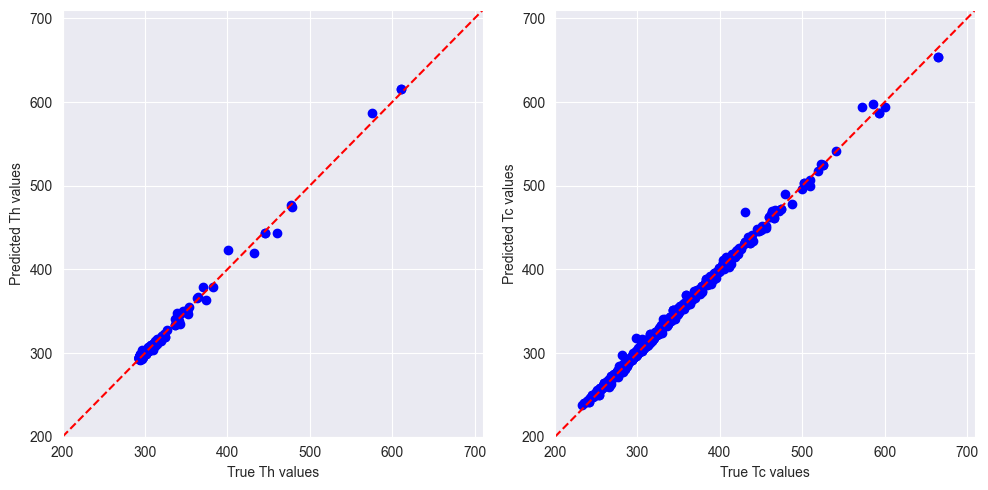

In [34]:
import matplotlib.pyplot as plt

# Assuming test_prediction, ANN_test_labels are Pandas DataFrames
test_prediction = loaded_model.predict(ANN_test_scaled_df)  # Using the predictions from the best model

# Extracting specific columns for Th and Tc predictions
Th_predictions = test_prediction[:, 0]
Tc_predictions = test_prediction[:, 1]

# Plotting
plt.figure(figsize=(10, 5))

# Plot Th predictions
plt.subplot(1, 2, 1)
plt.scatter(ANN_test_labels.iloc[:, 0], Th_predictions, color='blue')
plt.xlabel('True Th values')
plt.ylabel('Predicted Th values')
lims = [200, 710]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, 'r--')

# Plot Tc predictions
plt.subplot(1, 2, 2)
plt.scatter(ANN_test_labels.iloc[:, 1], Tc_predictions, color='blue')
plt.xlabel('True Tc values')
plt.ylabel('Predicted Tc values')
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, 'r--')

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('graphs/prediction_plot.png')

plt.show()
